In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, floor, ceil
from PIL import Image as im
import cv2
import math

In [ ]:
a = np.array([[157, 153,  174,  168,  150,  152,  129,  151,  172,  161,  156,  156],
              [155, 182,  163,  74,   75,   62,   33,   17,   110,  210,  180,  154],
              [180, 180,  50,   14,   34,   6,    10,   33,   48,   106,  159,  181],
              [206, 109,  5,    124,  131,  111,  120,  204,  166,  15,   56,   180],
              [194, 68,   137,  251,  237,  239,  239,  228,  227,  87,   71,   201],
              [172, 106,  207,  233,  233,  214,  220,  239,  228,  98,   74,   206],
              [188, 88,   179,  209,  185,  215,  211,  158,  139,  75,   20,   169],
              [189, 97,   165,  84,   10,   168,  134,  11,   31,   62,   22,   148],
              [199, 168,  191,  193,  158,  227,  178,  143,  182,  106,  36,   190],
              [205, 174,  155,  252,  236,  231,  149,  178,  228,  43,   95,   234],
              [190, 216,  116,  149,  236,  187,  86,   150,  79,   38,   218,  241],
              [190, 224,  147,  108,  227,  210,  127,  102,  36,   101,  255,  224],
              [190, 214,  173,  66,   103,  143,  96,   50,   2,    10,   249,  215],
              [187, 196,  235,  75,   1,    81,   47,   0,    6,    217,  255,  211],
              [183, 202,  237,  145,  0,    0,    12,   108,  200,  138,  243,  236],
              [196, 206,  123,  207,  177,  121,  123,  200,  175,  13,   96,   218]
              ], dtype=np.uint8)

In [ ]:
up_width = 480
up_height = 640
up_points = (up_height, up_width)

**Turn into pixel image**

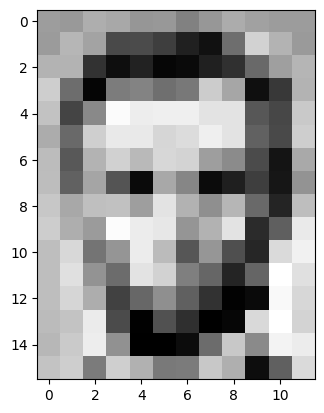

In [ ]:
data = im.fromarray(a)
data.save('lincoln.png')
plt.imshow(data, interpolation='nearest', cmap='gray')

<img src="https://editor.analyticsvidhya.com/uploads/488590%20CI5wgSszZnpHu5Ip.png" alt="imgpixels" style="height: 200px; width:600px;"/>

**1. NEAREST NEIGHBOR INTERPOLATION**

In [ ]:
def nearest(v, l):
    n = len(v)
    step = n / l
    result = []
    for k in range(l):
        x = round((k + 0.5) * step - 0.5)
        result.append(v[x])
    return result

def binearest(m, newsize):
    h = len(m)
    result = np.zeros((newsize[0], newsize[1]), dtype=np.uint8)
    rows = []

    for row in m:
        rows.append(nearest(row, newsize[1]))

    for k in range(newsize[1]):
        col = [row[k] for row in rows]

        new_col = nearest(col, newsize[0])
        for j in range(newsize[0]):
          result[j][k] = new_col[j]

    return result

In [ ]:
binear = binearest(a, up_points)

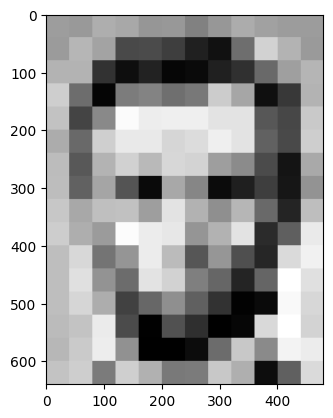

In [ ]:
binear_img = im.fromarray(binear)
binear_img.save('binear_lincoln.png')
plt.imshow(binear_img, cmap='gray')

**2. Bilinear Interpolation**

In [ ]:
def linear(v, l):
    n = len(v)

    step = n / l

    result = []
    lim = n - 1 - 1.19e-07
    for k in range(l):
        x = (k + 0.5) * step - 0.5
        x = max(0, min(x, lim))
        i = int(x)
        j = i + 1
        w1 = j - x
        w2 = 1 - w1
        result.append((v[i] * w1 + v[j] * w2).round())

    return result

def bilinear(m, newsize):
    h = len(m)
    result = np.zeros((newsize[0], newsize[1]))
    rows = []

    for row in m:
        rows.append(linear(row, newsize[1]))

    for k in range(newsize[1]):
        col = [row[k] for row in rows]
        new_col = linear(col, newsize[0])
        for j in range(newsize[0]):
            result[j][k] = new_col[j]

    return result


In [ ]:
bili = np.array(bilinear(a, up_points), dtype=np.uint8)

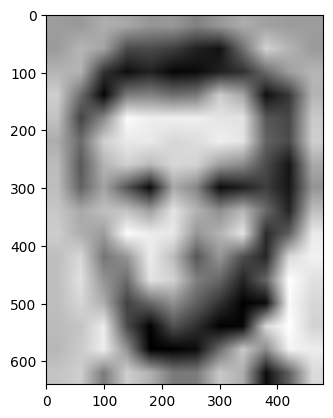

In [ ]:
bili_img = im.fromarray(bili)
bili_img.save('biline_lincoln.png')
plt.imshow(bili_img, cmap='gray')

**3. Bicubic Interpolation**

In [ ]:
def bicubic_interpolation(m, newsize):
    h = len(m)
    result = np.zeros((newsize[0], newsize[1]))
    rows = []

    for k in range(h):
      rows.append(cubic(m[k], newsize[1]))

    for j in range(newsize[1]):
      col = [row[j] for row in rows]
      new_col = cubic(col, newsize[0])
      for i in range(newsize[0]):
        result[i][j] = new_col[i]

    return result

def cubic(v, l):
    n = len(v)
    step = n / l
    result = []

    # Extend the input array with the first and last values repeated
    u = [v[0], v[0]] + list(v) + [v[-1], v[-1]]

    for k in range(l):
        x = (k + 0.5) * step + 1.5
        i = int(x)
        j = i + 1
        t = 1 - (j - x)
        y0 = u[i]
        y1 = u[j]
        m0 = (u[j] - u[i-1]) / 2
        m1 = (u[j+1] - u[i]) / 2

        a = 2 * y0 - 2 * y1 + m0 + m1
        b = -3 * y0 + 3 * y1 - 2 * m0 - m1
        c = m0
        d = y0
        yyy = round(a * t**3 + b * t**2 + c * t + d)
        if yyy < 0:
          result.append(0)
        elif yyy > 255:
          result.append(255)
        else:
          result.append(yyy)
    return result

In [ ]:
bicub = np.array(bicubic_interpolation(a.tolist(), up_points), dtype=np.uint8)

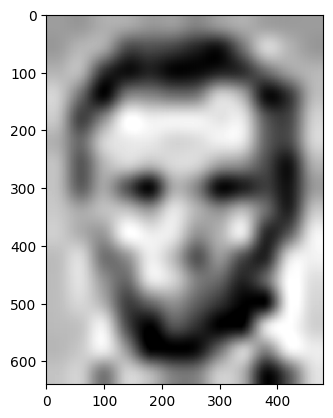

In [ ]:
bicub_img = im.fromarray(bicub)
bicub_img.save('bicubi_lincoln.png')
plt.imshow(bicub_img, interpolation='nearest', cmap='gray')

**4. Lanczos Interpolation**

In [ ]:
def bilanczos(m, newsize, a=4):
    h = len(m)
    result = np.zeros((newsize[0], newsize[1]))

    rows = []
    for k in range(h):
      rows.append(lanczos(m[k], newsize[1], a))

    for k in range(newsize[1]):
        col = [row[k] for row in rows]
        new_col = lanczos(col, newsize[0], a)
        for j in range(newsize[0]):
            result[j][k] = new_col[j]

    return result

def lanczos(v, l, a=4):
    n = len(v)
    step = n / l
    result = []

    for dx in range(l):
        x = (dx + 0.5) * step - 0.5
        xf = int(x)

        y = 0
        for i in range(xf - a + 1, xf + a + 1):
            j = i
            if i < 0:
                j = 0
            elif i > n - 1:
                j = n - 1
            y += v[j] * lanczos_kernel(x - i, a)
        if y < 0:
            y = 0
        elif y > 255:
            y = 255
        result.append(y)

    return result

def lanczos_kernel(x, a):
    if x == 0:
        return 1
    elif -a <= x < a:
        return (a * math.sin(math.pi * x) * math.sin(math.pi * x / a)) / (math.pi**2 * x**2)
    else:
        return 0

In [ ]:
lanczos = np.array(bilanczos(a.tolist(), up_points, 4), dtype=np.uint8)

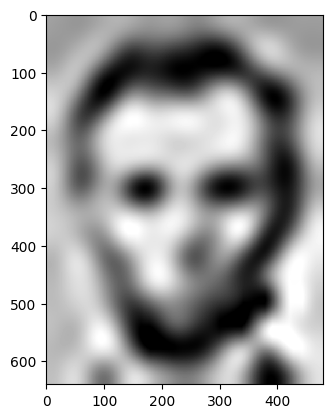

In [ ]:
lanczos_img = im.fromarray(lanczos)
lanczos_img.save('lanczos_img_lincoln.png')
plt.imshow(lanczos_img, interpolation='nearest', cmap='gray')

In [ ]:
testimg = np.array([[6, 2, 4], [1, 9, 5], [3, 0, 7]], dtype = np.uint8)
tesarr = np.array([6, 2, 4], dtype = np.uint8)
testcu213 = lanczos([6, 2, 4], 4, 2)
print(testcu213)

[6, 2, 2, 4]


**ĐÁNH GIÁ CÁC PHƯƠNG PHÁP**

In [ ]:
def read_image(path):

    img = cv2.imread(path)  # cv2.IMREAD_GRAYSCALE)
    size = img.shape
    dimension = (size[0], size[1])

    return img, size, dimension

In [ ]:
img, size, dimension = read_image("./lincoln.png")
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image = cv2.resize(gray_image, (480,640), interpolation = cv2.INTER_LANCZOS4 )

In [ ]:
def error_calculator(img1, img2):

    return np.average(abs(np.array(img1, dtype="int16") -
                          np.array(img2, dtype="int16")))

def error_calculator_manual(img1, img2):

    result = 0

    img1 = np.array(img1, dtype="int16")
    img2 = np.array(img2, dtype="int16")

    for i, j in zip(img1, img2):
        for k, l in zip(i, j):
            for v in range(len(k)):
                result += abs(k[v] - l[v])

    if len(img1.shape) == 3:
        return result / (img1.shape[0] * img1.shape[1] * img1.shape[2])
    else:
        return result / (img1.shape[0] * img1.shape[1])


def mean_squared_error(image1, image2):
    error = np.sum((image1.astype('float') - image2.astype('float')) ** 2)
    error = error / float(image1.shape[0] * image1.shape[1])
    # error = error / 65536
    return print("Mean Squared Error is", error)

def SNR(image1, image2):
    mean_image = np.mean(image1)
    noise = np.sum((image1 - mean_image)**2)
    var_moise = np.sum((image1 - image2)**2)
    if var_moise == 0:
        return 2
    Snr = 10 * np.log10(noise/var_moise)

    # if(mse == 0):  # MSE is zero means no noise is present in the signal .
    #               # Therefore PSNR have no importance.
    #     return 100
    # max_pixel = 255.0
    # snr = 20 * np.log10(max_pixel / sqrt(mse))]

    return print("Signal to Noise Ratio is", Snr)
    # print("SNR is", Snr)
    # return Snr

In [ ]:
mean_squared_error(gray_image, binear)
mean_squared_error(gray_image, bili)
mean_squared_error(gray_image, bicub)
mean_squared_error(gray_image, lanczos)
print("--------------")
SNR(gray_image, binear)
SNR(gray_image, bili)
SNR(gray_image, bicub)
SNR(gray_image, lanczos)
# SNR(gray_image, np.asarray(cubic_img_algo))

Mean Squared Error is 901.1762467447917
Mean Squared Error is 226.86300455729167
Mean Squared Error is 61.66244140625
Mean Squared Error is 1.75154296875
--------------
Signal to Noise Ratio is 17.830531337797964
Signal to Noise Ratio is 18.36357858682463
Signal to Noise Ratio is 20.581472277993274
Signal to Noise Ratio is 35.3960996824661


**test**

(16, 12)
